# 15.1 핵심 개념
- 엘라스틱넷은 릿지회귀와 라쏘회귀를 절충한 모델
- 규제항은 릿지 회귀의 규제항을 단순히 더해서 사용
- 두 규제항의 혼합정도를 혼합비율 r을 사용해 조절 : r=0이면 릿지회귀와 같고, r=1이면 라쏘회귀와 같게 된다.

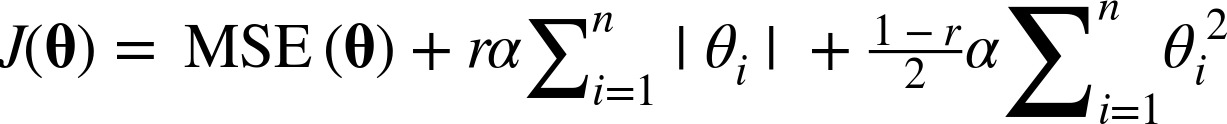

# 15.3 분석 코드

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data2=pd.read_csv('../data/house_price.csv', encoding='utf-8')
X=data2[data2.columns[:-1]]
y=data2[['house_value']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.linear_model import ElasticNet
model=ElasticNet()

In [2]:
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)
print(f"TrainSet Score : {model.score(X_scaled_train, y_train)}\nTestSet Score: {model.score(X_scaled_test, y_test)}")

TrainSet Score : 0.05038517013198185
TestSet Score: 0.05184820641905341


In [3]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error
RMSE_train=np.sqrt(mean_squared_error(y_train, pred_train))
RMSE_test=np.sqrt(mean_squared_error(y_test, pred_test))
print(f"TrainSet RMSE : {RMSE_train}\nTestSet RMSE : {RMSE_test}")

TrainSet RMSE : 93008.95996175197
TestSet RMSE : 93089.65255555119


In [5]:
# GridSearch
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(ElasticNet(),
                        param_grid={'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.5, 0.1, 1, 10, 100]},
                        cv=5)
grid_search.fit(X_scaled_train, y_train)

print("Best Parameter : ",grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)
print("TestSet Score : ", grid_search.score(X_scaled_test, y_test))

Best Parameter :  {'alpha': 1e-05}
Best Score :  0.5702758995264394
TestSet Score :  0.582611917681783


In [9]:
# RandomSearch
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
random_search=RandomizedSearchCV(ElasticNet(),
                                 param_distributions={'alpha':randint(low=0.00001, high=100)},
                                 cv=5,
                                 n_iter=100)
random_search.fit(X_scaled_train, y_train)

print("Best Parameter : ",random_search.best_params_)
print("Best Score : ", random_search.best_score_)
print("TestSet Score : ", random_search.score(X_scaled_test, y_test))

Best Parameter :  {'alpha': 0}
Best Score :  0.570275776011458
TestSet Score :  0.5826083517811865
